In [1]:
#first block: extracting information from files.
import sys
import math
import matplotlib.pyplot as plt
# Read the data from datapoints
with open('datapointss.txt', 'r') as file:
    data = []  
    for line in file:
        values = line.strip().split(',')
        try:
            width = float(values[0])
            height = float(values[1])
            label = int(values[2])
            data.append((width, height, label))
        except ValueError:
            print("")

# Read the test points from testpoints
with open('testpoints (6).txt', 'r') as file:
    testpoints = []  
    for line in file:
        value_test = line.strip().split(',')
        try:
            width_test = float(value_test[0])
            height_test = float(value_test[1])
            testpoints.append((width_test, height_test))
        except ValueError:
            print("")

# Print the first 5 training data points
print("First 5 training data points:")
for point in data[:5]:
    print(point)




First 5 training data points:
(21.959384499160468, 31.23956701424158, 0)
(23.63591632187622, 36.46821490673444, 1)
(17.714056417303343, 31.44170391314962, 0)
(21.78020031891186, 33.213397759738264, 1)
(25.20630552859312, 36.558816149350534, 1)


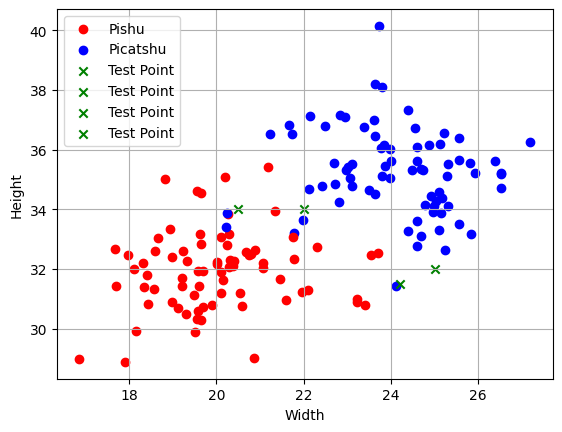

In [2]:
#plotting graph of picatshu positions, pishu positions, and test points.
picatshu_plotted = False
pishu_plotted = False

for width, height, label in data:
    if label == 1 and not picatshu_plotted:
        plt.scatter(width, height, color='blue', label='Picatshu')
        picatshu_plotted = True
    elif label == 0 and not pishu_plotted:
        plt.scatter(width, height, color='red', label='Pishu')
        pishu_plotted = True
    else:
        plt.scatter(width, height, color='blue' if label == 1 else 'red')

# Plot the test point
for width_test, height_test in testpoints:
      plt.scatter(width_test, height_test, color='green', marker='x', label='Test Point')


plt.xlabel('Width')
plt.ylabel('Height')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
#Second block: function which will help us how to find the answer for what pokemon it may be
def classify_point(point):
    nearest_points = []

    for labeled_point in data:
        distance = math.sqrt((point[0] - labeled_point[0]) ** 2 + (point[1] - labeled_point[1]) ** 2)
        nearest_points.append((labeled_point[2], distance))

    nearest_points.sort(key=lambda item: item[1])

    pichu_count = 0
    pikachu_count = 0

    for label, _ in nearest_points[:10]:
        if label == 0:
            pichu_count += 1
        elif label == 1:
            pikachu_count += 1

    if pikachu_count > pichu_count:
        return "Pikachu"
    elif pichu_count > pikachu_count:
        return "Pichu"
    else:
        return "Cannot determine"


In [4]:
#third block: Using functions in a for loop to get Results.

# Classify and print the test points
for i, testpoint in enumerate(testpoints):
    result = classify_point(testpoint)
    print(f"({testpoint[0]}, {testpoint[1]}) = {result}")

# i have lost a datapoint or 2 from my file so the 2nd one outputs cannot determine.

(25.0, 32.0) = Pikachu
(24.2, 31.5) = Cannot determine
(22.0, 34.0) = Pikachu
(20.5, 34.0) = Pichu
